## Atividade de nivelamento - Mineração de Dados

Aluno: Felipe Ferreira Vasconcelos


NUsp: 16298020

In [209]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib

In [210]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

## Seleção da base de dados

A base de dados escolhida foi uma base de dados sintético envolvendo informações de alunos (Notas de GPA e GMAT, raça, gênero e etc) e um campo informando o status da admissão deles em universidades norte-americanas.

O dataset está disponível no Kaggle: https://www.kaggle.com/datasets/taweilo/mba-admission-dataset

Campos:

* application_id: Identificador único
* gender: Gênero (Male/Female)
* international: Caso seja estudante internacional (TRUE/FALSE)
* gpa: Nota do GPA
* major: Area Major de graduação (e.g., STEM, Humanities)
* race: Raça
* gmat: Nota do GMAT
* work_exp: Anos de experiência de trabalho
* work_industry: Indústria em que o estudante trabalhou (Finance, Tech)
* admission: Status da admissão (e.g., Admit, Waitlist, Null: Deny)


In [211]:
df = pd.read_csv('mba.csv',index_col='application_id')
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [212]:
df.columns

Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat', 'work_exp', 'work_industry', 'admission'],
      dtype='object')

In [213]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


## Pré-processamento/Tratamento

Serão realizadas algumas operações para tratar e pré-processar os dados como: transformação de campos textuais em númericos, remoção de campos nulos, substituição de valores como Admission NaN para "Deny", entre outros.


In [214]:
df['admission'] = df['admission'].replace({None:"Denied"})
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Denied
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Denied
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Denied
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,Denied
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,Denied
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,Denied


In [ ]:
df = df.dropna()
df

<Axes: >

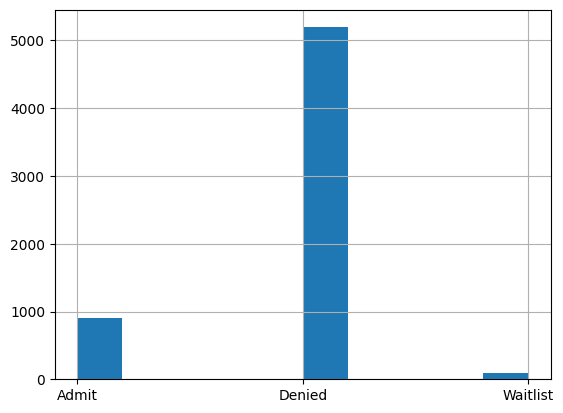

In [215]:
df.admission.hist()

In [216]:
# Enconding dos itens categóricos
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
dados = encoder.fit_transform(df[["gender","international","major","race","work_industry"]])

df[["gender","international","major","race","work_industry"]] = dados

df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0.0,0.0,3.30,0.0,0.0,620.0,3.0,3.0,Admit
1,2,1.0,0.0,3.28,1.0,1.0,680.0,5.0,6.0,Denied
2,3,0.0,1.0,3.30,0.0,NaN,710.0,5.0,13.0,Admit
3,4,1.0,0.0,3.47,2.0,1.0,690.0,6.0,13.0,Denied
4,5,1.0,0.0,3.35,2.0,2.0,590.0,5.0,1.0,Denied
...,...,...,...,...,...,...,...,...,...,...
6189,6190,1.0,0.0,3.49,0.0,4.0,640.0,5.0,9.0,Denied
6190,6191,1.0,0.0,3.18,2.0,1.0,670.0,4.0,1.0,Denied
6191,6192,0.0,1.0,3.22,0.0,NaN,680.0,5.0,4.0,Admit
6192,6193,1.0,1.0,3.36,0.0,NaN,590.0,5.0,9.0,Denied


In [218]:
# Padronização das features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_norm = scaler.fit_transform(df[["gender","international","gpa","major","race","gmat","work_exp","work_industry"]])
df_norm


array([[-1.32350517, -0.65057949,  0.32526081, ..., -0.6308059 ,
        -1.95375019, -0.72796884],
       [ 0.7555694 , -0.65057949,  0.19327277, ...,  0.58645722,
        -0.0164207 , -0.01940894],
       [-1.32350517,  1.53709118,  0.32526081, ...,  1.19508879,
        -0.0164207 ,  1.63389749],
       ...,
       [-1.32350517,  1.53709118, -0.20269135, ...,  0.58645722,
        -0.0164207 , -0.49178221],
       [ 0.7555694 ,  1.53709118,  0.72122493, ..., -1.23943747,
        -0.0164207 ,  0.68915096],
       [ 0.7555694 , -0.65057949, -0.13669733, ..., -0.02217434,
        -0.98508545, -1.20034211]])

In [219]:
df[["gender","international","gpa","major","race","gmat","work_exp","work_industry"]] = df_norm
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,-1.323505,-0.650579,0.325261,-1.299339,-1.218325,-0.630806,-1.953750,-0.727969,Admit
1,0.755569,-0.650579,0.193273,-0.007716,-0.604863,0.586457,-0.016421,-0.019409,Denied
2,-1.323505,1.537091,0.325261,-1.299339,NaN,1.195089,-0.016421,1.633897,Admit
3,0.755569,-0.650579,1.447159,1.283908,-0.604863,0.789334,0.952244,1.633897,Denied
4,0.755569,-0.650579,0.655231,1.283908,0.008599,-1.239437,-0.016421,-1.200342,Denied
...,...,...,...,...,...,...,...,...,...
6189,0.755569,-0.650579,1.579147,-1.299339,1.235523,-0.225052,-0.016421,0.689151,Denied
6190,0.755569,-0.650579,-0.466667,1.283908,-0.604863,0.383580,-0.985085,-1.200342,Denied
6191,-1.323505,1.537091,-0.202691,-1.299339,NaN,0.586457,-0.016421,-0.491782,Admit
6192,0.755569,1.537091,0.721225,-1.299339,NaN,-1.239437,-0.016421,0.689151,Denied


## KNN

Iremos executar o KNN algumas vezes. A primeira delas será realizada com todos os campos, ou seja, sem seleção de features. 

Após isso, o desempenho será avaliado e técnicas como *SelectKBest* serão aplicadas para observar se a seleção de features aumenta a acurácia. 

O objetivo desse classificador é identificar se um aluno seria ou não admitido em uma universidade. Ou seja, o target é o campo "admission".

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

y_train = df_train['admission']
X_train = df_train.drop(['admission'],axis='columns')
X_train

In [ ]:
y_test = df_test['admission']
X_test = df_test.drop(['admission'],axis='columns')
X_test

### Dummy Classifier

Para fins de comparação, primeiramente iremos testar com um Dummy Classifier

In [ ]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)
print(classification_report(y_test, dummy.predict(X_test)))

In [ ]:
from sklearn.model_selection import cross_val_score

dummyscores = cross_val_score(dummy, X_train, y_train, cv=5) 
print("Folds", dummyscores)
print("Acc:", np.mean(dummyscores))

### Sem seleção de features

In [224]:
# Execução do KNN com K=4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [225]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Admit       0.36      0.37      0.37       198
      Denied       0.88      0.89      0.88      1088
    Waitlist       0.00      0.00      0.00        20

    accuracy                           0.79      1306
   macro avg       0.41      0.42      0.42      1306
weighted avg       0.78      0.79      0.79      1306



In [226]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=5) 
print("Acc:", np.mean(scores))

Acc: 0.8026907857546636


A partir disso, podemos perceber que o KNN com k=4 apresenta desempenho próximo a um DummyClassifier. 

Ainda sem seleção de features, tentaremos achar o valor de K que aumente o desempenho.

In [229]:
# Execução do KNN com GridSearch

from sklearn.model_selection import GridSearchCV

knn_clean = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn_clean,
    param_grid={
        "n_neighbors":[x for x in range(1,10)],
        'metric':['cosine','euclidean','minkowski'],
    },
    scoring="accuracy",
    cv=5,
    error_score="raise"
)

grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.8355207408005599
KNeighborsClassifier(metric='cosine', n_neighbors=9)


### Analisar a questão de recall e etc, pq não só de acuracia vive o homem

### GridSearch

Com a técnica de GridSearch, visualizamos que o melhor paramêtro K para o KNN é o K=9, obtendo acurácia de 83%.

Iremos realizar a seleção de features com o objetivo de aumentar o desempenho do modelo.

### Seleção de Features

In [248]:
from sklearn.feature_selection import SelectKBest
for x in range (2,len(df.columns)+1):

    X_selected = SelectKBest(k=x).fit_transform(X_train,y_train)
    X_test_selected = SelectKBest(k=x).fit_transform(X_test,y_test)

    knn_clean = KNeighborsClassifier()

    grid_search = GridSearchCV(
        estimator=knn_clean,
        param_grid={
            "n_neighbors":[x for x in range(1,20)],
            'metric':['cosine','euclidean','minkowski'],
        },
        scoring="accuracy",
        cv=5,
        error_score="raise"
    )

    grid_search.fit(X_selected,y_train)

    print(x)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    print()


2
0.8351944870656007
KNeighborsClassifier(metric='cosine', n_neighbors=19)

3
0.8335551428033057
KNeighborsClassifier(metric='euclidean', n_neighbors=19)

4
0.8411036636248621
KNeighborsClassifier(metric='euclidean', n_neighbors=18)

5
0.8414315324773209
KNeighborsClassifier(metric='cosine', n_neighbors=17)

6
0.8430751837196157
KNeighborsClassifier(metric='euclidean', n_neighbors=19)

7
0.8394637809900669
KNeighborsClassifier(metric='euclidean', n_neighbors=19)

8
0.8394637809900669
KNeighborsClassifier(metric='euclidean', n_neighbors=19)



/home/felipe/code/usp/mineracao_dados/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/home/felipe/code/usp/mineracao_dados/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(


9
0.8394637809900669
KNeighborsClassifier(metric='euclidean', n_neighbors=19)



In [245]:

from sklearn.model_selection import GridSearchCV

knn_clean = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn_clean,
    param_grid={
        "n_neighbors":[x for x in range(1,10)],
        'metric':['cosine','euclidean','minkowski'],
    },
    scoring="accuracy",
    cv=5,
    error_score="raise"
)

grid_search.fit(X_selected,y_train)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.8273164822740855
KNeighborsClassifier(metric='euclidean', n_neighbors=9)


In [246]:
# Execução do KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')

knn.fit(X_selected, y_train)

y_pred = knn.predict(X_test_selected)

print(classification_report(y_test, y_pred))

scores = cross_val_score(knn, X_train, y_train, cv=3)
print("Acc:", np.mean(scores))

              precision    recall  f1-score   support

       Admit       0.27      0.10      0.15       198
      Denied       0.84      0.95      0.89      1088
    Waitlist       0.00      0.00      0.00        20

    accuracy                           0.81      1306
   macro avg       0.37      0.35      0.35      1306
weighted avg       0.74      0.81      0.76      1306

Acc: 0.8315813971529421


/home/felipe/code/usp/mineracao_dados/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/felipe/code/usp/mineracao_dados/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/felipe/code/usp/mineracao_dados/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [234]:
# Execução do KNN com GridSearch

from sklearn.model_selection import GridSearchCV

knn_clean = KNeighborsClassifier()
select_dim = SelectKBest()

grid_search = GridSearchCV(
    estimator=knn_clean,
    param_grid={
        "n_neighbors":[x for x in range(1,10)],
        
    },
    scoring="accuracy",
    cv=5,
)

grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.8345344423806832
KNeighborsClassifier(n_neighbors=7)


## Melhores paramêtros para o KNN

Após o teste sem e com seleção de features para obtermos um baseline, podemos agora avaliar, novamente, com o GridSearch, em busca dos melhores paramêtros.

## Clustering